In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [79]:
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [80]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [81]:
df.dropna(subset='Income', axis=0, inplace=True)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

df['Month'] = df['Dt_Customer'].dt.month
df['Day'] = df['Dt_Customer'].dt.day

In [82]:
df.drop('Dt_Customer', axis=1, inplace=True)

In [83]:
cate_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [84]:
df[cate_cols].nunique()

Education         5
Marital_Status    8
dtype: int64

In [85]:
for col in cate_cols:
    print(df[col].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


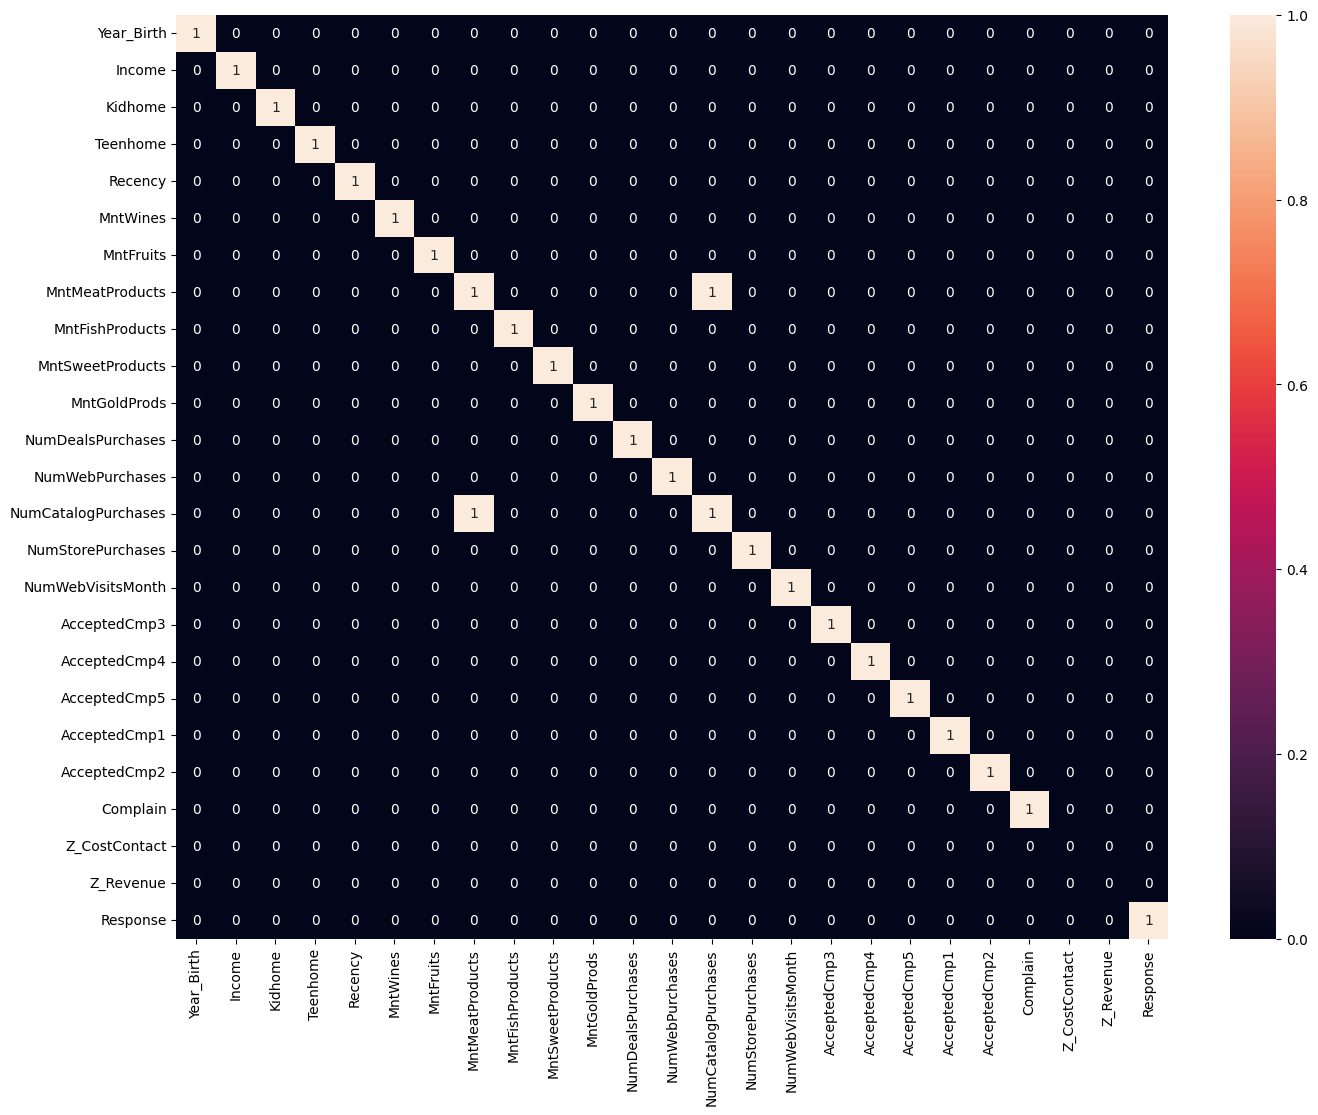

In [86]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[num_cols].corr() > 0.7, annot=True, fmt='d')
plt.show()

In [87]:
X = df[cate_cols + num_cols + ['Month', 'Day']].copy()

In [88]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

st = StandardScaler()
OH  = OneHotEncoder(handle_unknown='ignore')

processor = ColumnTransformer(transformers=[
    ('numm', st, num_cols + ['Month', 'Day']),
    ('cat', OH, cate_cols)
])

In [89]:
X_processed = processor.fit_transform(X)

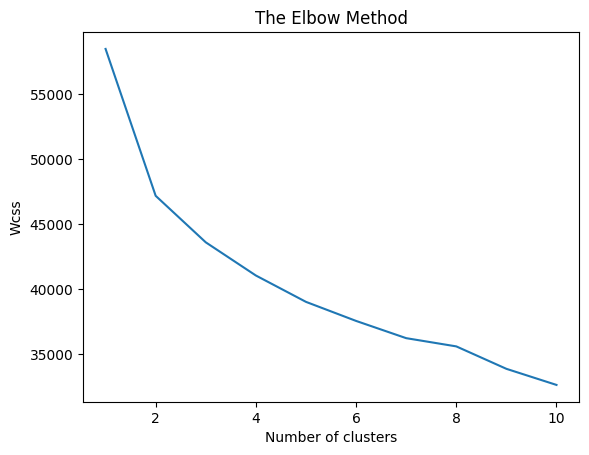

In [90]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmean.fit(X_processed)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X_processed)

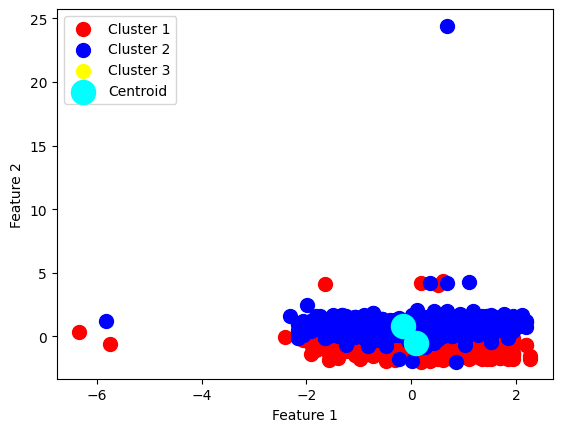

In [98]:
plt.scatter(X_processed[y_kmeans == 0, 0], X_processed[y_kmeans == 0, 1], s=100, label='Cluster 1', c='red')
plt.scatter(X_processed[y_kmeans == 1, 0], X_processed[y_kmeans == 1, 1], s=100, label='Cluster 2', c='blue')
plt.scatter(X_processed[y_kmeans == 2, 0], X_processed[y_kmeans == 2, 1], s=100, label='Cluster 3', c='yellow')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan', label='Centroid')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()